In [1]:
import pandas as pd
import numpy as np
from orbit.models.ets import ETSMAP
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.plot import plot_predicted_components
from orbit.utils.dataset import load_iclaims

In [2]:
import orbit
print(orbit.__version__)

1.0.14dev


In [3]:
%load_ext autoreload
%autoreload 2

## Data

In [4]:
raw_df = load_iclaims()
raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [5]:
df=raw_df.copy()

In [6]:
test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

In [17]:
ets = ETSMAP(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=2020,
)

In [18]:
ets.fit(train_df)

In [28]:
x = np.zeros((3, 5))
x[0].shape

(5,)

In [21]:
predicted_df = ets.predict(df=df, decompose=True)
predicted_df

,week,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95
0,2010-01-03,13.286105,13.386595,13.486913,12.950524,13.051014,13.151332,0.335581,0.335581,0.335581
1,2010-01-10,13.515528,13.617983,13.718117,12.949886,13.052341,13.152475,0.565642,0.565642,0.565642
2,2010-01-17,13.285824,13.382794,13.492658,12.958765,13.055735,13.165599,0.327059,0.327059,0.327059
3,2010-01-24,13.043964,13.146663,13.242228,12.951096,13.053795,13.149360,0.092868,0.092868,0.092868
4,2010-01-31,13.073595,13.172100,13.272249,12.960539,13.059043,13.159193,0.113056,0.113056,0.113056
...,...,...,...,...,...,...,...,...,...,...
438,2018-05-27,12.146110,12.329127,12.517731,12.244388,12.427405,12.616009,-0.098278,-0.098278,-0.098278
439,2018-06-03,12.085992,12.269740,12.452473,12.243657,12.427405,12.610139,-0.157665,-0.157665,-0.157665
440,2018-06-10,12.178840,12.368060,12.556089,12.238185,12.427405,12.615434,-0.059345,-0.059345,-0.059345
441,2018-06-17,12.142629,12.338719,12.526162,12.231316,12.427405,12.614849,-0.088687,-0.088687,-0.088687


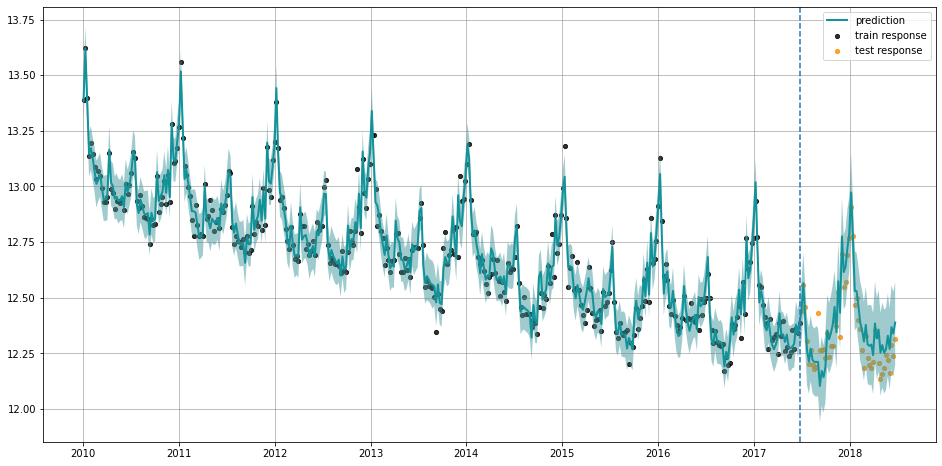

In [26]:
_ = plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col='week', actual_col='claims', 
                    test_actual_df=test_df)

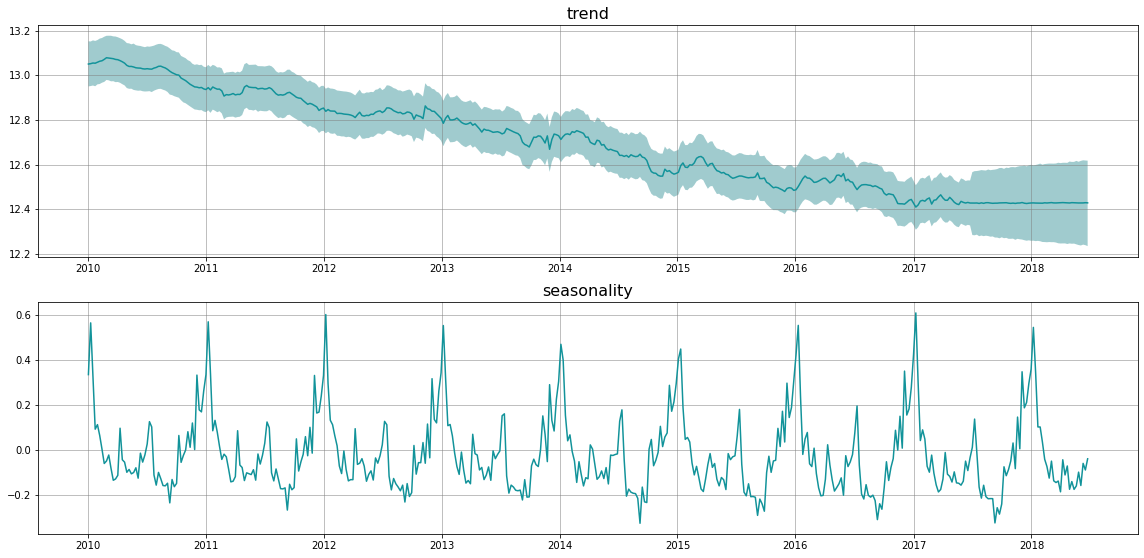

In [13]:
_ = plot_predicted_components(predicted_df=predicted_df, date_col='week')